In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

Using TensorFlow backend.


In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sum(train_df.dtypes=='object')

8

In [5]:
train_df.isnull().values.any()

False

In [6]:
train_df.shape

(4209, 378)

In [7]:
dummy=pd.get_dummies(train_df.iloc[:,1:8])
dummy.shape

(4209, 159)

In [8]:
train_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [9]:
train_df=train_df.drop(['ID','X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)

In [10]:
train_df.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_df=pd.concat([dummy,train_df],axis=1)

In [12]:
train_df.head()

,y,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

train=train_df.drop(['y'],axis=1)
test=train_df['y']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X_train)
X_train=scaler1.transform(X_train)
X_test=scaler1.transform(X_test);

In [16]:
X_train.shape

(2946, 526)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128,kernel_initializer='normal',input_dim =X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(2,activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [18]:
history=NN_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Train on 2946 samples, validate on 1263 samples
Epoch 1/150
2946/2946 [==============================] - 2s 690us/step - loss: 1826.0376 - mse: 1826.0374 - mae: 27.5527 - val_loss: 109.9136 - val_mse: 109.9136 - val_mae: 8.2004
Epoch 2/150
2946/2946 [==============================] - 1s 470us/step - loss: 86.4084 - mse: 86.4084 - mae: 6.1449 - val_loss: 78.0244 - val_mse: 78.0244 - val_mae: 5.8744
Epoch 3/150
2946/2946 [==============================] - 1s 431us/step - loss: 75.5342 - mse: 75.5342 - mae: 5.5369 - val_loss: 74.5392 - val_mse: 74.5392 - val_mae: 5.7247
Epoch 4/150
2946/2946 [==============================] - 1s 398us/step - loss: 70.6066 - mse: 70.6066 - mae: 5.2844 - val_loss: 87.8905 - val_mse: 87.8905 - val_mae: 7.6788
Epoch 5/150
2946/2946 [==============================] - 1s 452us/step - loss: 73.1714 - mse: 73.1713 - mae: 5.5728 - val_loss: 71.5135 - val_mse: 71.5134 - val_mae: 5.7478
Epoch 6/150
2946/2946 [==============================] - 1s 459us/step - loss: 6

Epoch 48/150
2946/2946 [==============================] - 1s 419us/step - loss: 38.2198 - mse: 38.2198 - mae: 4.1260 - val_loss: 100.5545 - val_mse: 100.5545 - val_mae: 6.6829
Epoch 49/150
2946/2946 [==============================] - 1s 441us/step - loss: 29.7612 - mse: 29.7612 - mae: 3.7564 - val_loss: 138.8129 - val_mse: 138.8129 - val_mae: 8.1019
Epoch 50/150
2946/2946 [==============================] - 1s 482us/step - loss: 30.2859 - mse: 30.2859 - mae: 3.8379 - val_loss: 114.8275 - val_mse: 114.8275 - val_mae: 7.4607
Epoch 51/150
2946/2946 [==============================] - 1s 430us/step - loss: 30.5517 - mse: 30.5517 - mae: 3.8811 - val_loss: 118.8465 - val_mse: 118.8465 - val_mae: 7.2024
Epoch 52/150
2946/2946 [==============================] - 1s 421us/step - loss: 33.3525 - mse: 33.3525 - mae: 3.9787 - val_loss: 104.2554 - val_mse: 104.2554 - val_mae: 7.1265
Epoch 53/150
2946/2946 [==============================] - 1s 387us/step - loss: 29.3664 - mse: 29.3664 - mae: 3.8009 - v

2946/2946 [==============================] - 1s 434us/step - loss: 13.8943 - mse: 13.8943 - mae: 2.5369 - val_loss: 122.1418 - val_mse: 122.1418 - val_mae: 7.3087
Epoch 141/150
2946/2946 [==============================] - 1s 415us/step - loss: 13.9880 - mse: 13.9880 - mae: 2.5723 - val_loss: 121.8456 - val_mse: 121.8457 - val_mae: 7.0981
Epoch 142/150
2946/2946 [==============================] - 1s 391us/step - loss: 14.1942 - mse: 14.1942 - mae: 2.5562 - val_loss: 109.7577 - val_mse: 109.7577 - val_mae: 7.1663
Epoch 143/150
2946/2946 [==============================] - 1s 426us/step - loss: 13.8458 - mse: 13.8458 - mae: 2.5048 - val_loss: 132.1255 - val_mse: 132.1255 - val_mae: 7.2669
Epoch 144/150
2946/2946 [==============================] - 1s 478us/step - loss: 18.3385 - mse: 18.3385 - mae: 3.0389 - val_loss: 116.6231 - val_mse: 116.6231 - val_mae: 7.1996loss: 17.9499 - mse: 17.9499 - mae: 
Epoch 145/150
2946/2946 [==============================] - 1s 417us/step - loss: 13.1738 - ms

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


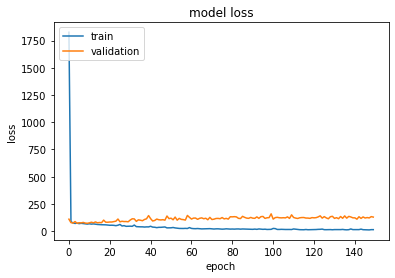

In [19]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()